In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import anndata
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc_context
import matplotlib.colors as mcolors

import pySTIM as pst


In [3]:
xe_adata = sc.read_h5ad("../Xenium_all.h5ad")

In [4]:
adata_vis = sc.read_h5ad("visium_fullres_all.h5ad")
adata_vis = adata_vis[adata_vis.obs["ident"].isin(['ShamR','Hour4R','Hour12R', 'Day2R', 'Day14R', 'Week6R'])]

In [5]:
adata_vis.obs

,in_tissue,array_row,array_col,n_counts,X_coords,Y_coords,ident,res2,x_centroid,y_centroid,celltype_raw
ShamR_0,1,21,85,9794.0,4799,4307,ShamR,15,4799,4307,PTS12
ShamR_1,1,40,96,14106.0,4087,2044,ShamR,3,4087,2044,PTS3
ShamR_2,1,45,73,11500.0,5671,1482,ShamR,5,5671,1482,PTS12
ShamR_3,1,34,62,11892.0,6400,2797,ShamR,12,6400,2797,PTS12
ShamR_4,1,49,115,13619.0,2807,957,ShamR,12,2807,957,PTS12
...,...,...,...,...,...,...,...,...,...,...,...
Week6R_1796,1,94,116,9386.0,5249,10842,Week6R,0,5249,10842,TAL
Week6R_1797,1,98,150,13505.0,7564,11348,Week6R,16,7564,11348,Pod
Week6R_1798,1,81,117,12991.0,5372,9311,Week6R,26,5372,9311,TAL
Week6R_1799,1,84,102,7447.0,4316,9619,Week6R,26,4316,9619,TAL


In [6]:
xe_adata.obs

,cell,x,y,cluster,n_transcripts,density,elongation,area,avg_confidence,x_centroid,...,celltype_FMP,celltype_refine,celltype_new,celltype_new2,region,TCN_label,celltype_bbknn,celltype_plot,TCN_label_new,predicted.celltype_merged
ShamL_1,1,5597.651238,5526.294516,12,76,0.06457,4.007,1177.00,1.0000,1189.500888,...,PTS1,PTS1,Healthy_S1,Healthy_PCT,Cortex,TCN_1,Healthy_S1,PTS1,CN1,PTS1
ShamL_2,2,5582.819340,5585.281452,12,77,0.05161,8.160,1492.00,1.0000,1186.349110,...,PTS1,PTS1,Healthy_S1,Healthy_PCT,Cortex,TCN_1,Healthy_S1,PTS1,CN1,PTS1
ShamL_3,3,5433.098963,5707.156717,24,24,0.06174,3.712,388.70,0.9991,1154.533530,...,Immune,EC1,EC1,EC,Cortex,TCN_4,NaN,Immune,CN4,EC1
ShamL_4,4,5661.731742,5512.500277,12,205,0.07086,2.793,2893.00,0.9998,1203.117995,...,PTS1,PTS1,Healthy_S1,Healthy_PCT,Cortex,TCN_1,Healthy_S1,PTS1,CN1,PTS1
ShamL_5,5,5381.578922,5799.392600,29,9,0.20120,10.880,44.74,0.9999,1143.585521,...,EC,Glom-EC,Glom-EC,Glom-EC,Cortex,TCN_6,NaN,EC,CN6,EC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Week6R_146821,146821,2353.227371,17434.410735,29,17,0.12770,1.592,133.10,1.0000,500.060816,...,Fib,Fib,Fib,Fib,Cortex,TCN_4,NaN,Fib,CN4,Fib
Week6R_147127,147127,13835.749045,10057.573855,22,11,0.12050,2.255,91.28,1.0000,2940.096672,...,PTS2,PTS2,Healthy_S2,Healthy_PCT,Cortex,TCN_1,Healthy_S2,PTS2,CN1,PTS2
Week6R_147130,147130,4040.029920,20035.769810,29,10,0.10710,7.700,93.38,1.0000,858.506358,...,Fib,MP,MP,MP,Cortex,TCN_6,NaN,Fib,CN6,PTS2
Week6R_147467,147467,15177.852740,8133.461160,19,10,0.26920,10.670,37.15,1.0000,3225.293707,...,EC,Glom-EC,Glom-EC,Glom-EC,Cortex,TCN_4,NaN,EC,CN4,EC1


# Registration all

In [4]:
sham_vis = adata_vis[adata_vis.obs.ident == "ShamR"]

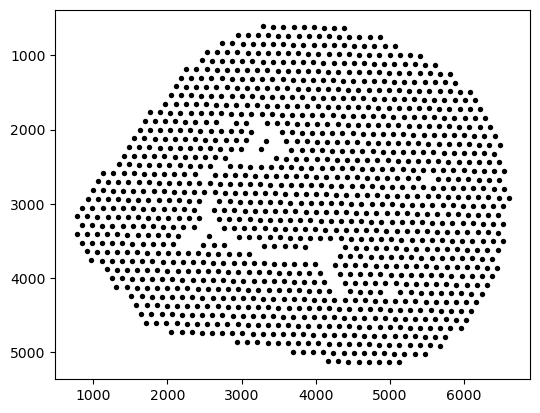

In [16]:
x = sham_vis.obs["X_coords"]
y = sham_vis.obs["Y_coords"]
fig, ax = plt.subplots(dpi=100)
ax.scatter(x, y,  marker='o', linewidth=0, alpha=1, color="black", s=15)
ax.axis('scaled')
ax.invert_yaxis()
plt.show()

In [7]:
H = np.array([[0.09405798593520641,3.41158653187994,-959.2731416178372],
             [3.41158653187994,-0.09405798593520641,-1528.8859782583281],
             [0,0,1]])

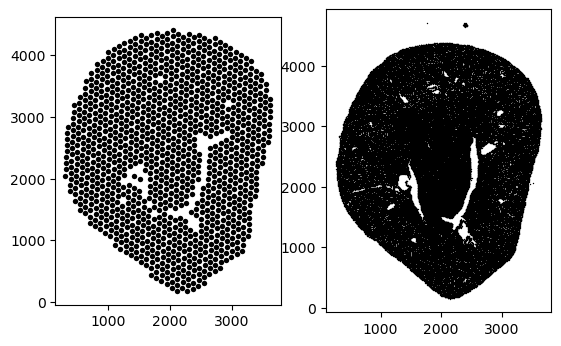

In [8]:
points_xe2 = align(H, sham_xe, sham_vis)

In [9]:
sham_vis.obs[["x_align","y_align"]] = points_xe2

/tmp/ipykernel_979157/3033947302.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sham_vis.obs[["x_align","y_align"]] = points_xe2


In [10]:
sham_corr_df, sham_Xenium_agg_gene_df = register_xenium_visium(sham_xe, sham_vis, spot_diameter=55)

/tmp/ipykernel_979157/2898463996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xenium["cell_id"] = df_xenium.index.tolist()
/tmp/ipykernel_979157/2898463996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visium["spot_id"] = df_visium.index.tolist()


(85880, 1224)
Mapping Xenium cells to Visium spots.....
Original Xenium cell #: 85880, mapped Xenium cell #:23747
Calculating psudobulk Xenium data.....
Top 5 correlated spatial gene expression .....
         pearson_r
Acsm3     0.856231
Cyp7b1    0.829400
Slc12a1   0.789112
Bcat1     0.788783
Slc7a13   0.769708
Aqp1      0.767921
Slc14a2   0.748023
Ptger3    0.746897
Fgf1      0.746502
Epcam     0.745752


## Hour4

In [37]:
hour4_vis = adata_vis[adata_vis.obs.ident == "Hour4R"]

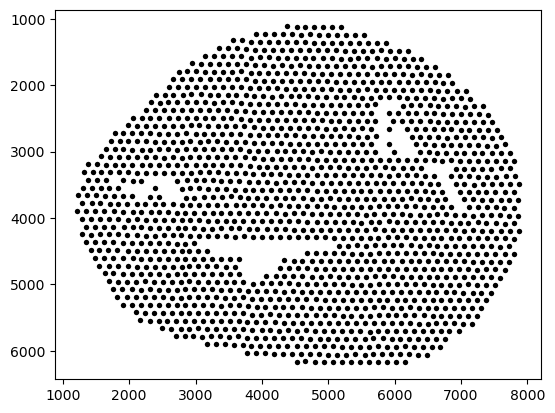

In [38]:
x = hour4_vis.obs["X_coords"]
y = hour4_vis.obs["Y_coords"]
fig, ax = plt.subplots(dpi=100)
ax.scatter(x, y,  marker='o', linewidth=0, alpha=1, color="black", s=15)
ax.axis('scaled')
ax.invert_yaxis()
plt.show()

In [39]:
H = np.array([[0.758057527279188,-3.3518368663606086,19396.80413685243],
                [-3.3518368663606086,-0.758057527279188,30176.74012657047],
                [0,0,1]])

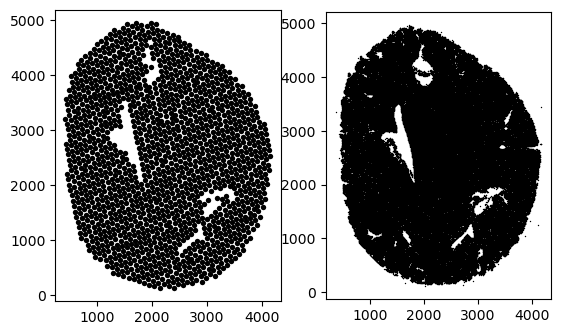

In [40]:
hour4_xe = xe_adata[xe_adata.obs.ident=="Hour4R"]
points_xe2 = align(H, hour4_xe, hour4_vis)

In [14]:
hour4_vis.obs[["x_align","y_align"]] = points_xe2
hour4_corr_df, hour4_Xenium_agg_gene_df = register_xenium_visium(hour4_xe, hour4_vis, spot_diameter=55)

/tmp/ipykernel_979157/2229236710.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  hour4_vis.obs[["x_align","y_align"]] = points_xe2
/tmp/ipykernel_979157/2898463996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xenium["cell_id"] = df_xenium.index.tolist()
/tmp/ipykernel_979157/2898463996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visium["spot_id"] = df_visium.index.tolist()


(114476, 1616)
Mapping Xenium cells to Visium spots.....
Original Xenium cell #: 114476, mapped Xenium cell #:32160
Calculating psudobulk Xenium data.....
Top 5 correlated spatial gene expression .....
          pearson_r
Cyp7b1     0.707636
Acsm3      0.666344
Bcat1      0.617945
Slc12a1    0.603389
Cd24a      0.597947
Slc22a19   0.591807
Epcam      0.563119
Slc7a13    0.557315
Tmigd1     0.551654
Aqp1       0.549644


## Hour12

In [42]:
hour12_vis = adata_vis[adata_vis.obs.ident == "Hour12R"]

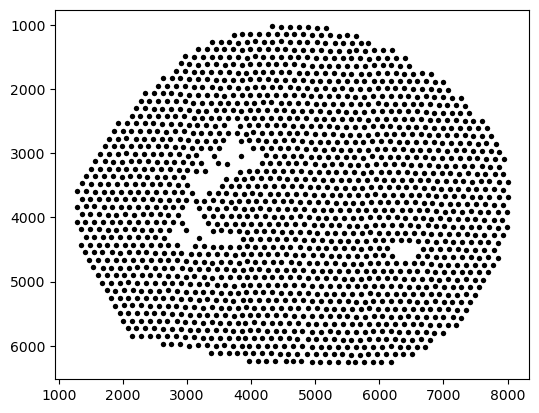

In [43]:
x = hour12_vis.obs["X_coords"]
y = hour12_vis.obs["Y_coords"]
fig, ax = plt.subplots(dpi=100)
ax.scatter(x, y,  marker='o', linewidth=0, alpha=1, color="black", s=15)
ax.axis('scaled')
ax.invert_yaxis()
plt.show()

In [44]:
H = np.array([[-0.4678743321572238,-3.381511240618091,25557.385900883437],
[-3.381511240618091,0.4678743321572238,28298.11470420696],
[0,0,1]])

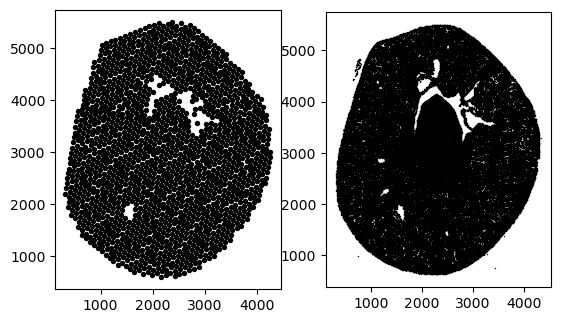

In [45]:
hour12_xe = xe_adata[xe_adata.obs.ident=="Hour12R"]
points_xe2 = align(H, hour12_xe, hour12_vis)

In [18]:
hour12_vis.obs[["x_align","y_align"]] = points_xe2
hour12_corr_df, hour12_Xenium_agg_gene_df = register_xenium_visium(hour12_xe, hour12_vis, spot_diameter=55)

/tmp/ipykernel_979157/3166726540.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  hour12_vis.obs[["x_align","y_align"]] = points_xe2
/tmp/ipykernel_979157/2898463996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xenium["cell_id"] = df_xenium.index.tolist()
/tmp/ipykernel_979157/2898463996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visium["spot_id"] = df_visium.index.tolist()


(109900, 1713)
Mapping Xenium cells to Visium spots.....
Original Xenium cell #: 109900, mapped Xenium cell #:30412
Calculating psudobulk Xenium data.....
Top 5 correlated spatial gene expression .....
         pearson_r
Acsm3     0.815003
Plau      0.801873
Cyp7b1    0.788299
Bcat1     0.780577
Krt20     0.775185
Slc14a2   0.773910
Msln      0.771225
Krt15     0.761335
Cd24a     0.733866
Aqp1      0.731659


## Day2

In [47]:
day2_vis = adata_vis[adata_vis.obs.ident == "Day2R"]

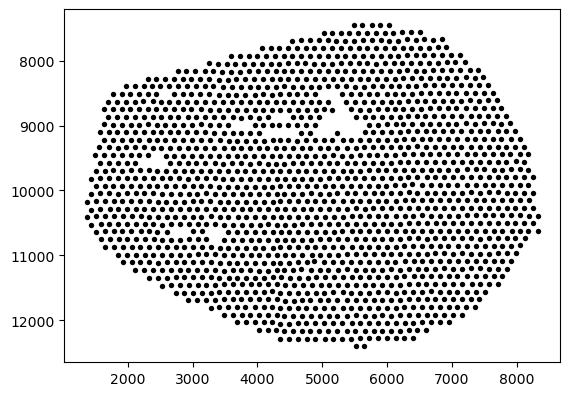

In [48]:
x = day2_vis.obs["X_coords"]
y = day2_vis.obs["Y_coords"]
fig, ax = plt.subplots(dpi=100)
ax.scatter(x, y,  marker='o', linewidth=0, alpha=1, color="black", s=15)
ax.axis('scaled')
ax.invert_yaxis()
plt.show()

In [49]:
H = np.array([[-0.5353740126509499,3.382206756760819,-20282.45042867608],
[3.382206756760819,0.5353740126509499,-9580.13067869143],
[0,0,1]])

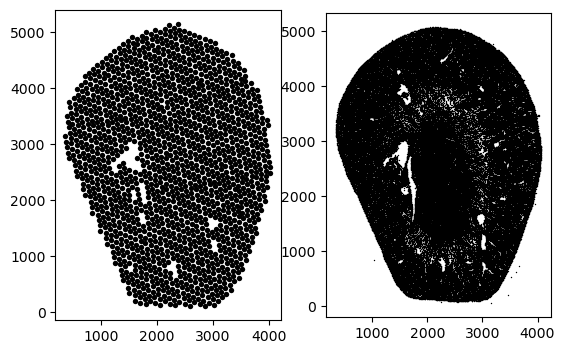

In [50]:
day2_xe = xe_adata[xe_adata.obs.ident=="Day2R"]
points_xe2 = align(H, day2_xe, day2_vis)

In [22]:
day2_vis.obs[["x_align","y_align"]] = points_xe2
day2_corr_df, day2_Xenium_agg_gene_df = register_xenium_visium(day2_xe, day2_vis, spot_diameter=55)

/tmp/ipykernel_979157/2682245912.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  day2_vis.obs[["x_align","y_align"]] = points_xe2
/tmp/ipykernel_979157/2898463996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xenium["cell_id"] = df_xenium.index.tolist()
/tmp/ipykernel_979157/2898463996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visium["spot_id"] = df_visium.index.tolist()


(109245, 1629)
Mapping Xenium cells to Visium spots.....
Original Xenium cell #: 109245, mapped Xenium cell #:29988
Calculating psudobulk Xenium data.....
Top 5 correlated spatial gene expression .....
         pearson_r
Krt5      0.780980
Krt14     0.749075
Krt15     0.745201
Slc14a2   0.668645
Spon1     0.667983
Umod      0.659045
Msln      0.651988
Timp3     0.626447
Cyp4b1    0.624552
Hnf4a     0.623204


## Day14

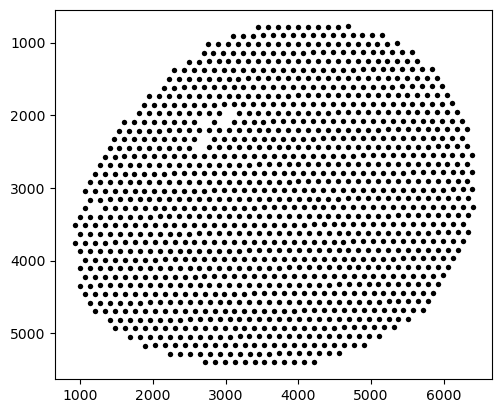

In [52]:
day14_vis = adata_vis[adata_vis.obs.ident == "Day14R"]
x = day14_vis.obs["X_coords"]
y = day14_vis.obs["Y_coords"]
fig, ax = plt.subplots(dpi=100)
ax.scatter(x, y,  marker='o', linewidth=0, alpha=1, color="black", s=15)
ax.axis('scaled')
ax.invert_yaxis()
plt.show()

In [53]:
H = np.array([[-0.5469166593220294,-3.379128311794105,21924.139678856005],
                [-3.379128311794105,0.5469166593220294,21929.19477279954],
                [0,0,1]])

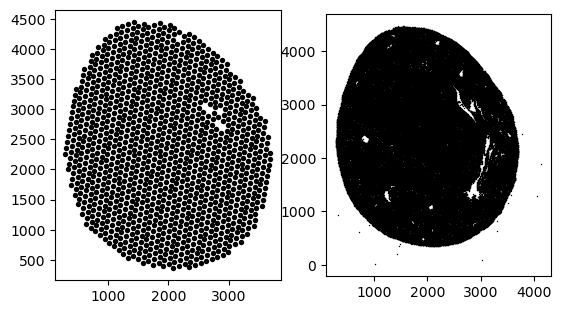

In [54]:
day14_xe = xe_adata[xe_adata.obs.ident=="Day14R"]
points_xe2 = align(H, day14_xe, day14_vis)

In [26]:
day14_vis.obs[["x_align","y_align"]] = points_xe2
day14_corr_df, day14_Xenium_agg_gene_df = register_xenium_visium(day14_xe, day14_vis, spot_diameter=55)

/tmp/ipykernel_979157/3955060008.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  day14_vis.obs[["x_align","y_align"]] = points_xe2
/tmp/ipykernel_979157/2898463996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xenium["cell_id"] = df_xenium.index.tolist()
/tmp/ipykernel_979157/2898463996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visium["spot_id"] = df_visium.index.tolist()


(116408, 1276)
Mapping Xenium cells to Visium spots.....
Original Xenium cell #: 116408, mapped Xenium cell #:32246
Calculating psudobulk Xenium data.....
Top 5 correlated spatial gene expression .....
         pearson_r
Acsm3     0.760247
Inmt      0.719380
Slc7a13   0.716156
Cndp2     0.699788
Tmigd1    0.698824
Cyp4b1    0.690082
Smoc2     0.688964
Slc5a8    0.683750
Acox2     0.678121
Cyp2e1    0.665767


## Week6

In [56]:
H = np.array([[-0.5663049760088475,3.3814529114893075,-23138.74226462691],
[3.3814529114893075,0.5663049760088475,-6989.65179014177],
[0,0,1]])

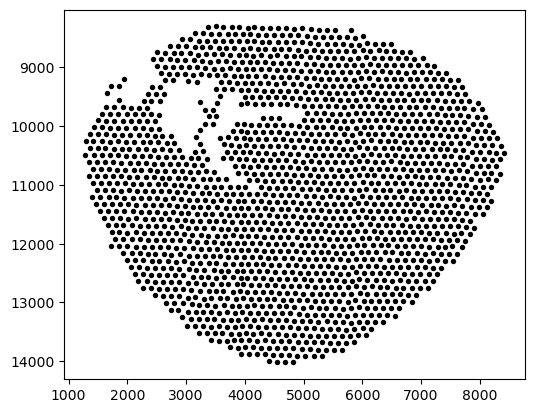

In [57]:
week6_vis = adata_vis[adata_vis.obs.ident == "Week6R"]
x = week6_vis.obs["X_coords"]
y = week6_vis.obs["Y_coords"]

fig, ax = plt.subplots(dpi=100)
ax.scatter(x, y,  marker='o', linewidth=0, alpha=1, color="black", s=15)
ax.axis('scaled')
ax.invert_yaxis()
plt.show()

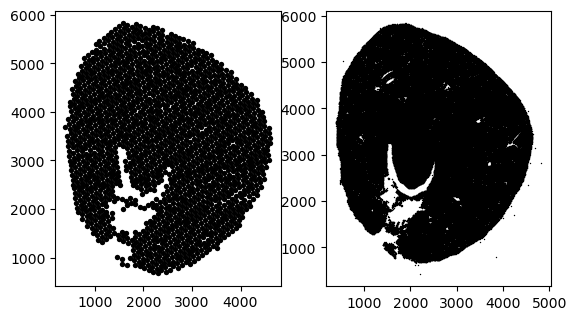

In [58]:
week6_xe = xe_adata[xe_adata.obs.ident=="Week6R"]
points_xe2 = align(H, week6_xe, week6_vis)

In [30]:
week6_vis.obs[["x_align","y_align"]] = points_xe2
week6_corr_df, week6_Xenium_agg_gene_df = register_xenium_visium(week6_xe, week6_vis, spot_diameter=55)

/tmp/ipykernel_979157/2412862865.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  week6_vis.obs[["x_align","y_align"]] = points_xe2
/tmp/ipykernel_979157/2898463996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xenium["cell_id"] = df_xenium.index.tolist()
/tmp/ipykernel_979157/2898463996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visium["spot_id"] = df_visium.index.tolist()


(124754, 1801)
Mapping Xenium cells to Visium spots.....
Original Xenium cell #: 124754, mapped Xenium cell #:33776
Calculating psudobulk Xenium data.....
Top 5 correlated spatial gene expression .....
          pearson_r
Cyp7b1     0.875633
Havcr1     0.873050
Slc14a2    0.844403
C3         0.825942
Slc7a13    0.814150
Fst        0.806466
Slc12a1    0.806189
Acsm3      0.802344
Ptger3     0.798383
Slc22a19   0.797490


In [61]:
corr_df_all = pd.concat([sham_corr_df,hour4_corr_df,hour12_corr_df,day2_corr_df,day14_corr_df,week6_corr_df])
corr_df_all.to_csv("Xe2vis_map_df_diameter_55um.csv")

In [5]:
def align(H, adata_xe, adata_vis):

    ### convert HE coordinates to Xenium DAPI coordinates and scale
    points_vis = np.array(adata_vis.obs[["X_coords","Y_coords"]])
    points_vis2 = np.hstack((points_vis, np.ones((points_vis.shape[0], 1))))
    points_xe = np.dot(points_vis2, H.T)
    points_xe2 = points_xe[:, :2] / points_xe[:, 2, np.newaxis]
    points_xe2 = points_xe2*0.2125
    
    fig, axs = plt.subplots(1,2,dpi=100)
    axs[0].scatter(points_xe2[:,0], points_xe2[:,1],  marker='o', linewidth=0, alpha=1, color="black", s=15)
    axs[0].axis('scaled')
    axs[1].scatter(adata_xe.obs["x_centroid"], adata_xe.obs["y_centroid"],  marker='o', linewidth=0, alpha=1, color="black", s=1)
    axs[1].axis('scaled')
    plt.show()

    return points_xe2

In [6]:
def register_xenium_visium(adata_xe, adata_vis, spot_diameter=100):
    
    from scipy.spatial.distance import cdist
    
    df_xenium = adata_xe.obs[['x_centroid', 'y_centroid','celltype_plot']]
    df_xenium["cell_id"] = df_xenium.index.tolist()
    
    df_visium =  adata_vis.obs[["x_align","y_align"]]
    df_visium["spot_id"] = df_visium.index.tolist()
    distances = cdist(df_xenium[['x_centroid', 'y_centroid']], df_visium[["x_align","y_align"]], metric='euclidean')
    print(distances.shape)
    
    include_cells = distances <= (spot_diameter / 2)
    print("Mapping Xenium cells to Visium spots.....")
    # Create a DataFrame for cell to spot correspondence
    corr_df = pd.DataFrame([{'cell_id': adata_xe.obs_names[cell_idx],
                             'spot_id': adata_vis.obs_names[spot_idx]}
                            for cell_idx, row in enumerate(include_cells)
                            for spot_idx, within in enumerate(row) if within])
    
    # Ensure the order of spots matches the Visium data
    ordered_index = adata_vis.obs[adata_vis.obs.index.isin(corr_df.spot_id.tolist())].index
    print(f"Original Xenium cell #: {adata_xe.shape[0]}, mapped Xenium cell #:{corr_df.shape[0]}")
    
    gene_overlap = [g for g in adata_xe.var_names if g in adata_vis.var_names]
    # Aggregate gene expression for cells within each spot
    print("Calculating psudobulk Xenium data.....")
    count_df = sc.get.obs_df(adata_xe, keys=gene_overlap, use_raw=True)
    agg_gene = []

    for spot_id in adata_vis.obs_names:
        cells_in_spot = corr_df[corr_df['spot_id'] == spot_id]['cell_id']
        counts = count_df.loc[cells_in_spot.tolist(),]
        sum_counts = counts.sum(axis=0).to_numpy()
        agg_gene.append(sum_counts)
    
    agg_gene_df = pd.DataFrame(agg_gene, columns=gene_overlap, index=adata_vis.obs_names)
    agg_gene_df.fillna(0, inplace=True)

    ## check the aggregation by aggregating genes and calculate correlation
    agg_gene_df = agg_gene_df.loc[adata_vis.obs.index,]
    Xenium_agg_gene_df = agg_gene_df.loc[:,gene_overlap]
    Visium_gene_df = sc.get.obs_df(adata_vis, keys = gene_overlap, use_raw=True)
    
    corr = pd.DataFrame(Xenium_agg_gene_df.corrwith(Visium_gene_df, method = "pearson",), columns = ["pearson_r"])
    corr[corr["pearson_r"]<=0] = 0
    corr = corr.fillna(0)
    print("Top 5 correlated spatial gene expression .....")
    print(corr.sort_values(by = "pearson_r", ascending=False).head(10))

    return corr_df, Xenium_agg_gene_df